In [1]:
%matplotlib inline

import numpy as np
import pandas as pd # Data frames
import matplotlib.pyplot as plt # Visuals
import seaborn as sns # Danker visuals
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
from urllib.request import urlopen
from sklearn.metrics import f1_score,confusion_matrix

pd.set_option('display.max_columns', 500) 
plt.style.use('ggplot') 

In [2]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'] 

breast_cancer_dataset = pd.read_csv(urlopen(UCI_data_URL), names=names)
breast_cancer_dataset.set_index(['id_number'], inplace = True) 
namesInd = names[2:] 

In [3]:
breast_cancer_dataset.head()
print("Here's the dimensions of our data frame:\n", 
     breast_cancer_dataset.shape)
print("Here's the data types of our columns:\n",
     breast_cancer_dataset.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

In [4]:
# Converted diagnosis to binary
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis']\
  .map({'M':1, 'B':0})
breast_cancer_dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
def distribution_diagnosis(data_frame, column):
    n = 0
    j = 0
    perc_malignant = 0 
    perc_begnin = 0
    for column in data_frame[column]:
        if (column == 1):
            j += 1
        elif (column == 0):
            n += 1
    perc_malignant = (j/len(data_frame)) * 100
    perc_begnin = (n/len(data_frame)) * 100
    print("The percentage of Malignant Diagnoses is: {0:.3f}%"\
          .format(perc_malignant))
    print("The percentage of Begnin Diagnoses is: {0:.3f}%"\
          .format(perc_begnin))

In [6]:
distribution_diagnosis(breast_cancer_dataset, 'diagnosis')

The percentage of Malignant Diagnoses is: 37.258%
The percentage of Begnin Diagnoses is: 62.742%


In [7]:
#Basic Statistics of each input variable
breast_cancer_dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  after removing the cwd from sys.path.


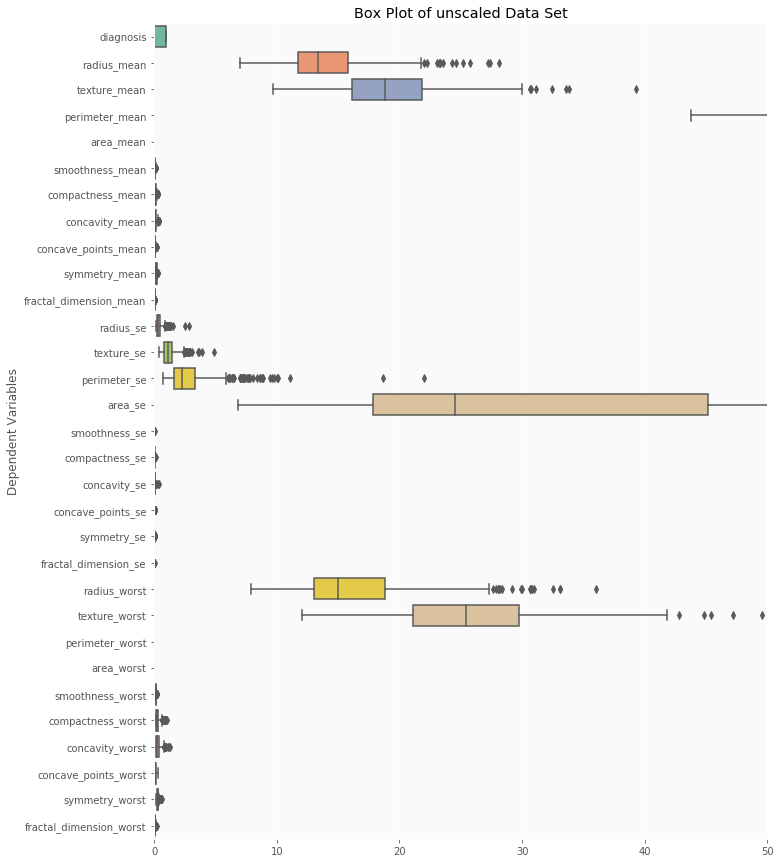

In [8]:
#Box plot of unscaled data
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 50))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of unscaled Data Set")
ax = sns.boxplot(data = breast_cancer_dataset, 
  orient = 'h', 
  palette = 'Set2')

In [9]:
# Normalization 
def normalize_df(frame):
    breast_cancerNorm = pd.DataFrame()
    for item in frame:
        if item in frame.select_dtypes(include=[np.float]):
            breast_cancerNorm[item] = ((frame[item] - frame[item].min()) / 
            (frame[item].max() - frame[item].min()))
        else: 
            breast_cancerNorm[item] = frame[item]
    return breast_cancerNorm

In [10]:
breast_cancerNorm = normalize_df(breast_cancer_dataset)
breast_cancerNorm.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  after removing the cwd from sys.path.


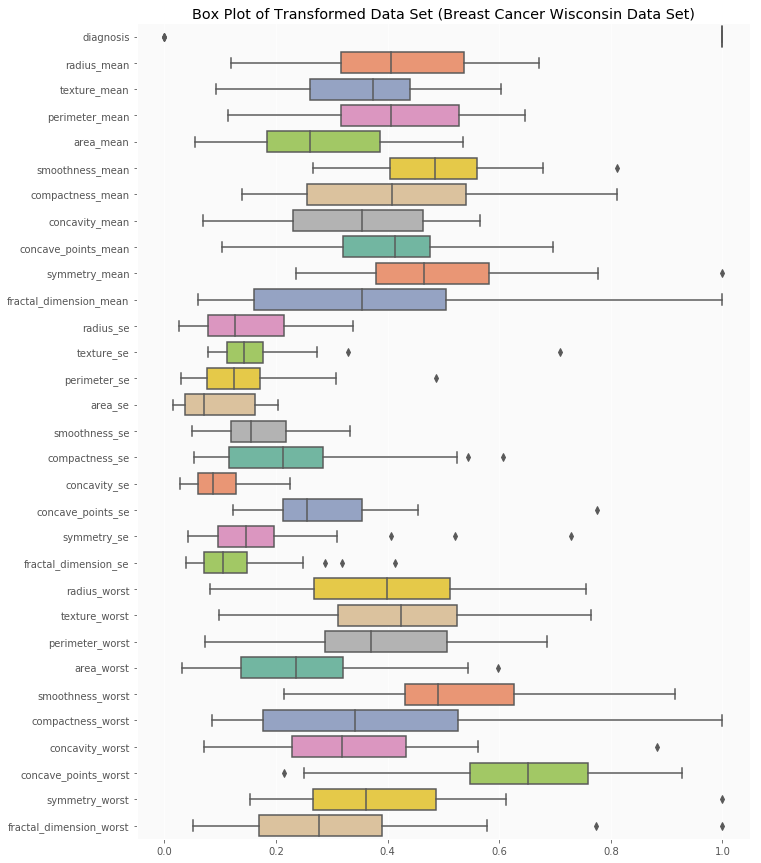

In [11]:
#Box plot of normalized data
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
plt.title("Box Plot of Transformed Data Set (Breast Cancer Wisconsin Data Set)")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancerNorm[1:29], 
  orient = 'h', 
  palette = 'Set2')

C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

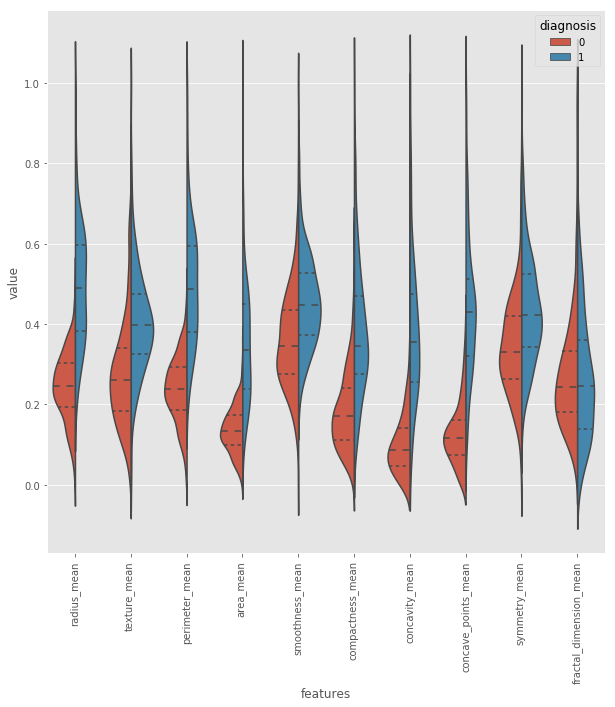

In [12]:
#Violin Plots for first 10 variables
x= breast_cancerNorm.ix[:, breast_cancerNorm.columns != 'diagnosis']
y = breast_cancerNorm.ix[:, breast_cancerNorm.columns == 'diagnosis']
data_dia = y
data = x
data = pd.concat([data_dia,data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

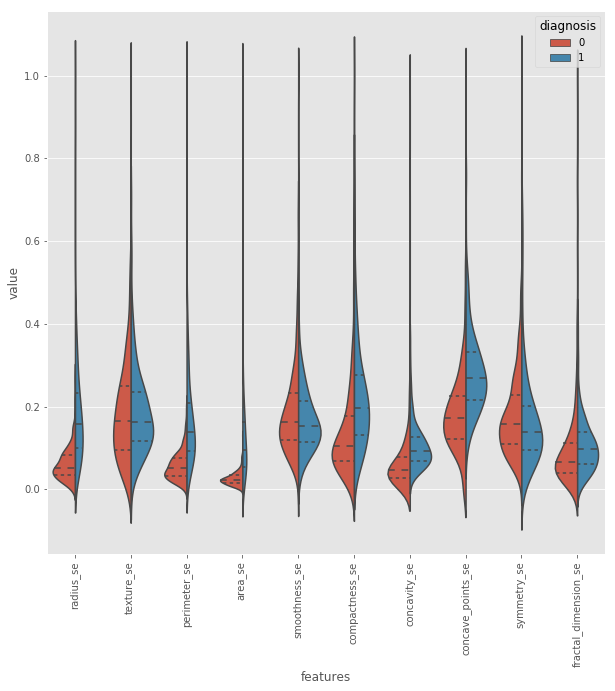

In [14]:
#Violin Plots for first variables 11 to 20
x= breast_cancerNorm.ix[:, breast_cancerNorm.columns != 'diagnosis']
y = breast_cancerNorm.ix[:, breast_cancerNorm.columns == 'diagnosis']
data_dia = y
data = x
data = pd.concat([data_dia,data.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

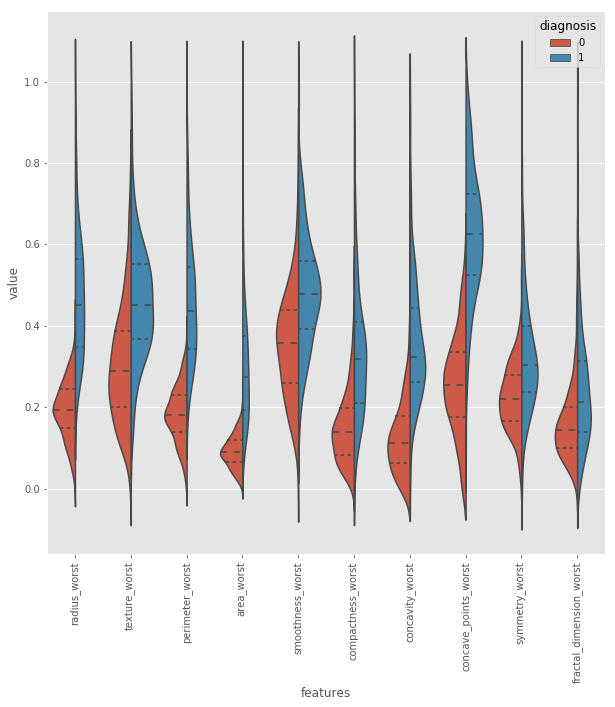

In [15]:
#Violin Plots for first variables 21 to 30
x= breast_cancerNorm.ix[:, breast_cancerNorm.columns != 'diagnosis']
y = breast_cancerNorm.ix[:, breast_cancerNorm.columns == 'diagnosis']
data_dia = y
data = x
data = pd.concat([data_dia,data.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

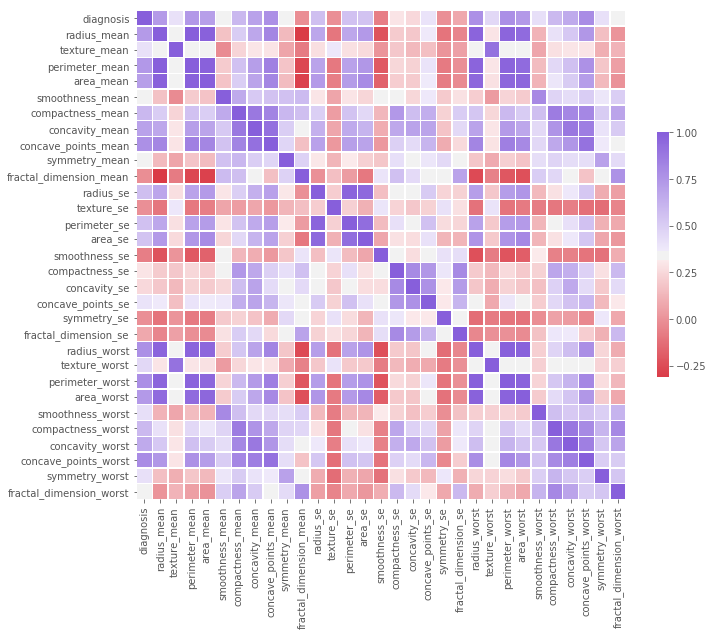

In [16]:
#Pearson Correlation Matrix
corr = breast_cancer_dataset.corr(method = 'pearson') # Correlation Matrix

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)
sns.heatmap(corr,  cmap=cmap,square=True, 
            xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [17]:
#feature Selection
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_se','concave_points_se',
              'texture_worst','area_worst']
feat_select = breast_cancer_dataset.drop(drop_list1,axis = 1 )         
feat_select.head()


,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,
842302,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
842517,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
84300903,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
84348301,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
84358402,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [18]:
# Splitting dataset- 80% training and 20% test dataset
train, test = train_test_split(feat_select, 
                               test_size = 0.20, 
                               random_state = 42)
training_set = train.ix[:, train.columns != 'diagnosis']
class_set = train.ix[:, train.columns == 'diagnosis']
test_set = test.ix[:, test.columns != 'diagnosis']
test_class_set = test.ix[:, test.columns == 'diagnosis']

C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Cross Validation Accuracy:  0.96 (+/-  0.02)
Accuracy of the test set: 93.86%
Execution time: 0.099741 seconds 



C:\Users\Navyasree J\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


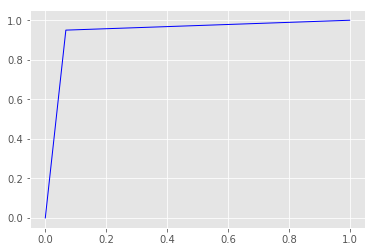

The area under ROC curve for NB:
 0.941
The F1 score for the test set is :
 0.9157


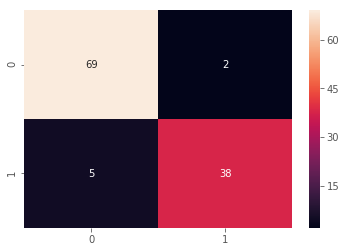

In [19]:
# Gaussian Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

start = time.time()

clf = GaussianNB()
clf.fit(training_set, class_set)

prediction = clf.predict(test_set)
accuracy_all=[]
end = time.time()
#10-Fold Cross Validation
n = KFold(n_splits=10)

scores = cross_val_score(clf, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)
print("Cross Validation Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))
print("Accuracy of the test set: {0:.2%}".format(accuracy_score(prediction, test_class_set)))
print("Execution time: {0:.5} seconds \n".format(end-start))
#ROC Curve
fpr3, tpr3, _ = roc_curve(prediction, test_class_set)
auc_nb = auc(fpr3, tpr3)
plt.plot(fpr3,tpr3,label='NB ROC curve (area={0: .3f})'.format(auc_nb),color='blue',linewidth=1)
plt.show()
print("The area under ROC curve for NB:\n {0:.3f}"\
      .format(auc_nb))
#F1 Scores for the test set:
F1score=f1_score(test_class_set.values,prediction,pos_label=1)
print("The F1 score for the test set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(test_class_set,prediction)
sns.heatmap(conf_matrix,annot=True,fmt="d")

The F1 score for the train set is :
 0.8936
The accuracy for the train set is :
 0.9231


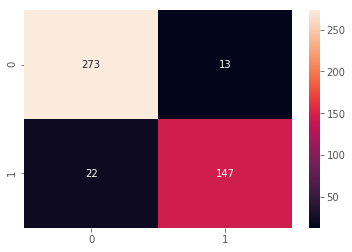

In [20]:
#train set evaluations for Gaussian NB
prediction_train_nb = clf.predict(training_set)
#F1 Scores for the test set:
F1score=f1_score(class_set.values,prediction_train_nb,pos_label=1)
print("The F1 score for the train set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(class_set,prediction_train_nb)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#accuracy
accuracy=clf.score(training_set, class_set['diagnosis'])
print("The accuracy for the train set is :\n {0:.4f}"\
      .format(accuracy))

C:\Users\Navyasree J\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross Validation Accuracy:  0.80 (+/-  0.08)
LinearSVC Accuracy of the test set: 93.86%
Execution time: 0.19451 seconds 



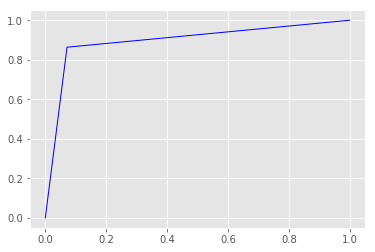

The area under ROC curve for Linear SVC:
 0.896
The F1 score for the test set is :
 0.8736


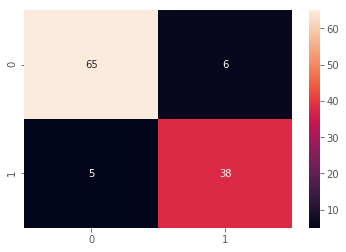

In [21]:
#Linear SVC Algorithm

from sklearn.svm import LinearSVC
start = time.time()

clf_svc = LinearSVC()
clf_svc.fit(training_set, class_set)
prediction_svc = clf_svc.predict(test_set)
end = time.time()
#10-Fold Cross Validation
n = KFold(n_splits=10)

scores = cross_val_score(clf_svc, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)
print("Cross Validation Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))
print("LinearSVC Accuracy of the test set: {0:.2%}".format(accuracy_score(prediction, test_class_set)))
print("Execution time: {0:.5} seconds \n".format(end-start))
#ROC Curve
fpr9, tpr9, _ = roc_curve(prediction_svc, test_class_set)
auc_svc = auc(fpr9, tpr9)
plt.plot(fpr9,tpr9,label='NB ROC curve (area={0: .3f})'.format(auc_svc),color='blue',linewidth=1)
plt.show()
print("The area under ROC curve for Linear SVC:\n {0:.3f}"\
      .format(auc_svc))
#confusion matrix
conf_matrix = confusion_matrix(test_class_set,prediction_svc)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#F1 Scores for the test set:
F1score=f1_score(test_class_set.values,prediction_svc,pos_label=1)
print("The F1 score for the test set is :\n {0:.4f}"\
      .format(F1score))


The F1 score for the train set is :
 0.7343
The accuracy for the train set is :
 0.8044


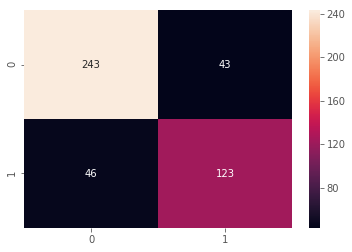

In [22]:
#train set evaluations for Linear SVC
prediction_train_svc = clf_svc.predict(training_set)
#F1 Scores for the test set:
F1score=f1_score(class_set.values,prediction_train_svc,pos_label=1)
print("The F1 score for the train set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(class_set,prediction_train_svc)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#accuracy
accuracy=clf_svc.score(training_set, class_set['diagnosis'])
print("The accuracy for the train set is :\n {0:.4f}"\
      .format(accuracy))

In [23]:
#Random Forest Algorithm
start = time.time()
fit_RF = RandomForestClassifier(random_state = 42, 
    bootstrap=True,
    max_depth=4,
    criterion='entropy',
    n_estimators = 500)
fit_RF.fit(training_set, class_set['diagnosis'])
predictions_RF = fit_RF.predict(test_set)
end=time.time()
fit_RF.fit(training_set, class_set['diagnosis'])
print("Execution time: {0:.5} seconds \n".format(end-start))

Execution time: 1.0777 seconds 



In [24]:
#feature importance in Random Forest
importancesRF = fit_RF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF
# Print the feature ranking
print("Feature ranking:")

for f in range(16):
    i = f
    print("%d. The feature '%s' \
    has a Information Gain of %f" % (f + 1,
                namesInd[indicesRF[i]],
                importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'texture_mean'     has a Information Gain of 0.205985
2. The feature 'area_mean'     has a Information Gain of 0.184619
3. The feature 'area_se'     has a Information Gain of 0.180884
4. The feature 'concave_points_mean'     has a Information Gain of 0.152250
5. The feature 'radius_mean'     has a Information Gain of 0.053287
6. The feature 'smoothness_se'     has a Information Gain of 0.042528
7. The feature 'fractal_dimension_mean'     has a Information Gain of 0.036282
8. The feature 'perimeter_se'     has a Information Gain of 0.036277
9. The feature 'perimeter_mean'     has a Information Gain of 0.019806
10. The feature 'compactness_mean'     has a Information Gain of 0.019598
11. The feature 'texture_se'     has a Information Gain of 0.017127
12. The feature 'compactness_se'     has a Information Gain of 0.015342
13. The feature 'radius_se'     has a Information Gain of 0.012361
14. The feature 'symmetry_mean'     has a Information Gain of 0.008257

In [25]:
indRf = sorted(importancesRF) # Sort by Decreasing order
index = np.arange(16)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

C:\Users\Navyasree J\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


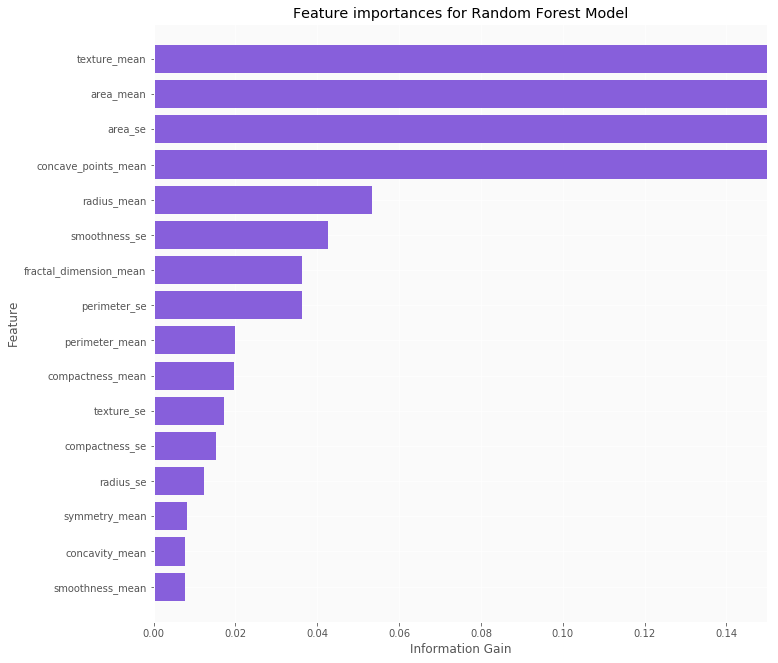

In [26]:
feature_space = []
for i in range(15, -1, -1):
    feature_space.append(namesInd[indicesRF[i]])
f, ax = plt.subplots(figsize=(11, 11))

ax.set_axis_bgcolor('#fafafa')
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')

plt.yticks(index, feature_space)
plt.ylim(-1, 16)
plt.xlim(0, 0.15)
plt.xlabel('Information Gain')
plt.ylabel('Feature')

plt.show()

Accuracy:  0.94 (+/-  0.03)
Here is our mean accuracy of RF on the test set:
 0.974


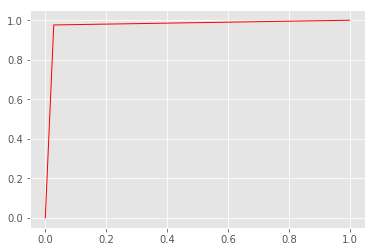

The area under ROC curve for RFClassifier:
 0.974
The F1 score for the test set is :
 0.9647


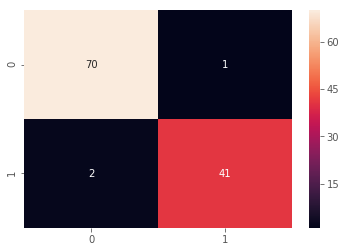

In [27]:
n = KFold(n_splits=10)
scores = cross_val_score(fit_RF, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)

print("Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))
predictions_RF = fit_RF.predict(test_set)
accuracy_RF = fit_RF.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy of RF on the test set:\n {0:.3f}"\
      .format(accuracy_RF))
fpr2, tpr2, _ = roc_curve(predictions_RF, 
                          test_class_set)
auc_rf = auc(fpr2, tpr2)
#ROC curve
auc_rf = auc(fpr2, tpr2)
plt.plot(fpr2,tpr2,label='RF ROC curve (area={0: .3f})'.format(auc_rf),color='red',linewidth=1)
plt.show()
print("The area under ROC curve for RFClassifier:\n {0:.3f}"\
      .format(auc_rf))
#F1 Scores for the test set:
F1score=f1_score(test_class_set.values,predictions_RF,pos_label=1)
print("The F1 score for the test set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(test_class_set,predictions_RF)
sns.heatmap(conf_matrix,annot=True,fmt="d")

The F1 score for the train set is :
 0.9910
The accuracy for the train set is :
 0.9934


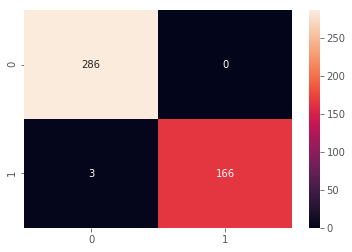

In [28]:
#train set evaluations for  RF
prediction_train_rf = fit_RF.predict(training_set)
#F1 Scores for the test set:
F1score=f1_score(class_set.values,prediction_train_rf,pos_label=1)
print("The F1 score for the train set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(class_set,prediction_train_rf)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#accuracy
accuracy=fit_RF.score(training_set, class_set['diagnosis'])
print("The accuracy for the train set is :\n {0:.4f}"\
      .format(accuracy))

C:\Users\Navyasree J\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execution time: 0.1371 seconds 

Cross Validation Accuracy:  0.93 (+/-  0.03)
AdaboostClassifier Accuracy: 94.74%


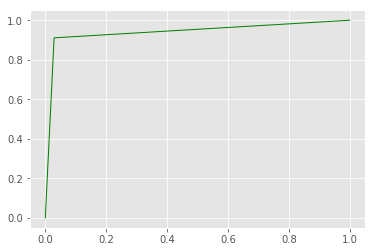

The area under ROC curve for AdaBoostClassifier:
 0.941
The F1 score for the test set is :
 0.9318


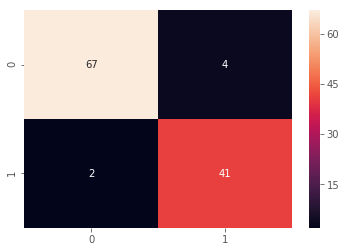

In [29]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
start = time.time()
clf_ada = AdaBoostClassifier(algorithm='SAMME')
clf_ada.fit(training_set, class_set)
prediction = clf_ada.predict(test_set)
end = time.time()
print("Execution time: {0:.5} seconds \n".format(end-start))
#10-Fold Cross Validation
n = KFold(n_splits=10)

scores = cross_val_score(clf_ada, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)
print("Cross Validation Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))
print("AdaboostClassifier Accuracy: {0:.2%}".format(accuracy_score(prediction, test_class_set)))
#ROC curve
fpr4, tpr4, _ = roc_curve(prediction, test_class_set)
auc_ada = auc(fpr4, tpr4)
plt.plot(fpr4,tpr4,label='Adaboost ROC curve (area={0: .3f})'.format(auc_ada),color='green',linewidth=1)
plt.show()
print("The area under ROC curve for AdaBoostClassifier:\n {0:.3f}"\
      .format(auc_ada))
#F1 Scores for the test set:
F1score=f1_score(test_class_set.values,prediction,pos_label=1)
print("The F1 score for the test set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(test_class_set,prediction)
sns.heatmap(conf_matrix,annot=True,fmt="d")

The F1 score for the train set is :
 1.0000
The accuracy for the train set is :
 1.0000


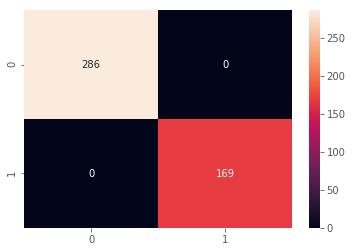

In [30]:
#train set evaluations for adaboost
prediction_train_ada = clf_ada.predict(training_set)
#F1 Scores for the test set:
F1score=f1_score(class_set.values,prediction_train_ada,pos_label=1)
print("The F1 score for the train set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(class_set,prediction_train_ada)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#accuracy
accuracy=clf_ada.score(training_set, class_set['diagnosis'])
print("The accuracy for the train set is :\n {0:.4f}"\
      .format(accuracy))

In [31]:
# K-Nearest neighbours

#Finding the optimal K
myKs = []
for j in range(0, 50):
    if (j % 2 != 0):
        myKs.append(j)

cross_vals = []
for k in myKs:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             training_set, 
                             class_set['diagnosis'], 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = myKs[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 19


Execution time: 0.0 seconds 

Cross Validation Accuracy:  0.94 (+/-  0.04)
Here is our accuracy for our test set:  1.000


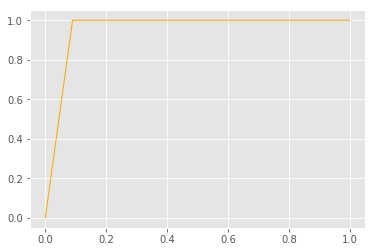

The area under ROC curve for knn-Classifier:
 0.955
The F1 score for the test set is :
 0.9114


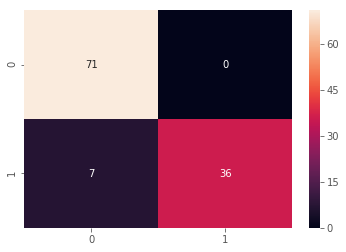

In [32]:
start=time.time()
fit_knn = KNeighborsClassifier(n_neighbors=19)
fit_knn.fit(training_set, class_set['diagnosis'])
predictions = fit_knn.predict(test_set)
end=time.time()
print("Execution time: {0:.5} seconds \n".format(end-start))
n = KFold(n_splits=10)

scores = cross_val_score(fit_knn, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)
print("Cross Validation Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))
print("Here is our accuracy for our test set: {0: .3f}"\
  .format(accuracy))
#ROC
fpr, tpr, _ = roc_curve(predictions, test_class_set)
auc_knn = auc(fpr, tpr)
plt.plot(fpr,tpr,label='knn ROC curve (area={0: .3f})'.format(auc_knn),color='orange',linewidth=1)
plt.show()
print("The area under ROC curve for knn-Classifier:\n {0:.3f}"\
      .format(auc_knn))
#F1 Scores for the test set:
F1score=f1_score(test_class_set.values,predictions,pos_label=1)
print("The F1 score for the test set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(test_class_set,predictions)
sns.heatmap(conf_matrix,annot=True,fmt="d")

The F1 score for the train set is :
 0.8301
The accuracy for the train set is :
 0.8857


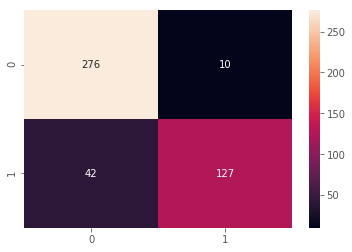

In [33]:
#train set evaluations for knn
prediction_train_knn = fit_knn.predict(training_set)
#F1 Scores for the test set:
F1score=f1_score(class_set.values,prediction_train_knn,pos_label=1)
print("The F1 score for the train set is :\n {0:.4f}"\
      .format(F1score))
#confusion matrix
conf_matrix = confusion_matrix(class_set,prediction_train_knn)
sns.heatmap(conf_matrix,annot=True,fmt="d")
#accuracy
accuracy=fit_knn.score(training_set, class_set['diagnosis'])
print("The accuracy for the train set is :\n {0:.4f}"\
      .format(accuracy))